# 🏡 Day 4 - Regularization on California Housing Dataset
### Regularization Techniques Comparison: Lasso vs Ridge vs ElasticNet

A comparative analysis of **Lasso**, **Ridge**, and **ElasticNet** regularization techniques applied on the **California Housing Dataset** to evaluate their impact on model performance, stability, and generalization.


---

## 1. Introduction
Regularization is an essential technique in Machine Learning used to improve model generalization by reducing overfitting.  
In regression problems, models can easily become too complex and start capturing noise from the training data instead of true patterns.  
Regularization introduces a penalty term to the loss function, which discourages large coefficient values and helps simplify the model.  

This project focuses on understanding and comparing three key regularization methods — **Lasso (L1)**, **Ridge (L2)**, and **ElasticNet (L1 + L2)**.  
By applying these techniques on the **California Housing Dataset**, the project explores how each method affects model performance, coefficient shrinkage, and interpretability.  
The goal is to demonstrate how regularization stabilizes regression models and identifies the most impactful features in predicting housing values.


---

## 2. Project Objectives
The main objectives of this project are as follows:
- To understand how **regularization techniques** help control overfitting in regression models.  
- To compare the performance of **Lasso**, **Ridge**, and **ElasticNet** regression using the California Housing Dataset.  
- To tune and analyze the **regularization parameters (alpha and l1_ratio)** for optimal model performance.  
- To evaluate the impact of each method on **model accuracy, generalization, and feature selection**.  
- To draw insights into **which features most influence housing prices** and how different penalties affect them.


---

## 3. Dataset Overview
The **California Housing Dataset** is a real-world regression dataset derived from the 1990 U.S. Census data.  
It provides information about various housing and demographic factors across different districts in California and is commonly used for regression tasks.

**Dataset Details:**
- **Source:** `fetch_california_housing()` from Scikit-learn  
- **Number of Samples:** 20,640  
- **Number of Features:** 8 numerical predictors  
- **Target Variable:** `MedHouseVal` — Median house value (in $100,000s)

**Feature Descriptions:**

| Feature | Description |
|----------|-------------|
| **MedInc** | Median income in the block group |
| **HouseAge** | Average age of houses in the area |
| **AveRooms** | Average number of rooms per household |
| **AveBedrms** | Average number of bedrooms per household |
| **Population** | Population of the block group |
| **AveOccup** | Average number of household members |
| **Latitude** | Latitude coordinate of the district |
| **Longitude** | Longitude coordinate of the district |

The dataset is ideal for regression analysis as it contains continuous numerical features and exhibits multicollinearity — a perfect scenario to apply regularization techniques.


---

## 4. Methodology and Approach
The project follows a structured machine learning workflow consisting of the following steps:

### Step 1: Data Loading and Preprocessing
- Loaded the dataset using Scikit-learn’s `fetch_california_housing()` function.  
- Split the dataset into **training (80%)** and **testing (20%)** subsets.  
- Scaled the numerical features using **StandardScaler()** to ensure that all variables contribute equally to model training.

### Step 2: Baseline Model
- Built a **Linear Regression (OLS)** model as the baseline.  
- Evaluated its performance to compare improvements achieved by regularization techniques.

### Step 3: Applying Regularization
- Implemented and tuned three models:
  - **Lasso Regression (L1 penalty):** Performs feature selection by setting some coefficients to zero.  
  - **Ridge Regression (L2 penalty):** Reduces model variance by shrinking coefficients without eliminating them.  
  - **ElasticNet (L1 + L2 penalty):** Combines the advantages of both Lasso and Ridge for balanced regularization.  
- Used **cross-validation (5-fold)** to find the best hyperparameters such as `alpha` and `l1_ratio`.

### Step 4: Model Evaluation
- Compared models based on:
  - **R² Score:** Measures how well the model explains variance in the target variable.  
  - **RMSE (Root Mean Squared Error):** Measures average prediction error magnitude.  
  - **Number of Non-zero Coefficients:** Assesses model sparsity and feature selection.  
- Visualized results using **bar plots** and **coefficient path plots** to illustrate the effect of regularization.

### Step 5: Model Saving
- Saved trained models (`Lasso`, `Ridge`, `ElasticNet`) and the `StandardScaler` object using **joblib** for future reuse and deployment.


---

## 5. Tools & Libraries Used
This project utilizes various Python libraries that are essential for data analysis, model building, and visualization.

- **Python 3.x:** The primary programming language used for data analysis and model development.  
- **NumPy:** Used for numerical computations and handling arrays efficiently.  
- **Pandas:** Facilitates data manipulation, inspection, and tabular data operations.  
- **Scikit-learn:** The core library used for building and evaluating machine learning models. It provides:
  - Regression models (Lasso, Ridge, ElasticNet)
  - Data preprocessing utilities (StandardScaler)
  - Model evaluation metrics and cross-validation functions  
- **Matplotlib:** Used for data visualization, plotting coefficient paths, and comparing model performance.  
- **Joblib:** Employed for saving and loading trained models efficiently.  
- **Jupyter Notebook:** Used as the development environment for running and documenting the project interactively.


---

## 6. Importing Libraries

In [14]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import warnings

# scikit-learn imports
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import lasso_path

# models
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV, Ridge, Lasso, ElasticNet

# configurations
warnings.filterwarnings("ignore", category=FutureWarning)

print('All imports successful and configurations set!')

All imports successful and configurations set!


---

## 7. Data Loading and Initial Exploration

Before proceeding with model development, it is essential to **load and explore the dataset** to gain a clear understanding of its structure and quality.  
This phase includes importing the data, examining its dimensions and data types, identifying missing or inconsistent values, and analyzing key descriptive statistics.  

#### Load the Dataset

In [18]:
data = fetch_california_housing(as_frame=True)
df = data.frame
print('Data Loaded!')
df.head()

Data Loaded!


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#### Dataset Shape

In [20]:
df.shape

(20640, 9)

#### Dataset Information

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


#### Statistical Summary

In [24]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


#### Missing Values

In [26]:
print(df.isnull().sum().sum(), "missing values found.")

0 missing values found.


---

## 8. Data Splitting and Feature Scaling

Before training the regression models, we first need to **separate the features and the target variable**.  
In this dataset, the target variable is **`MedHouseVal`** (median house value), and the remaining columns are the **predictor features**.

Next, we check the shape of X and y to verify the number of samples and features in the dataset.

In [29]:
X = df.drop(columns=['MedHouseVal'])   # features
y = df['MedHouseVal']                  # target (median house value)

X.shape, y.shape

((20640, 8), (20640,))

To properly evaluate our models, we split the data into **training** and **testing** sets.  
An **80–20 split** is used — 80% of the data for training and 20% for testing.  
The parameter **`random_state=42`** is set to ensure that the results are **reproducible** every time the code is run.


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Regularization techniques like **Lasso**, **Ridge**, and **ElasticNet** are **sensitive to the scale of features**.  
To ensure all variables contribute equally to model training, we apply **feature scaling** using `StandardScaler()`.  
This transformation standardizes the data so that each feature has a **mean of 0** and a **standard deviation of 1**.


In [33]:
# scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

After scaling, **`X_train_scaled`** and **`X_test_scaled`** contain the **normalized feature values**,  
while **`y_train`** and **`y_test`** remain unchanged since the target variable does not require scaling.  
These scaled datasets are now **ready for model training**.


---

## 9. Baseline Model – Linear Regression

Before applying **regularization techniques**, it is important to establish a **baseline model** for comparison.  
A **Linear Regression (Ordinary Least Squares)** model serves as a simple starting point to evaluate how well the unregularized model performs.  
This helps us understand whether **regularization improves model accuracy and generalization** or not.


In [37]:
# Train the baseline Linear Regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_lr = lr.predict(X_test_scaled)

print("Linear Regression model trained successfully and predictions generated.")

Linear Regression model trained successfully and predictions generated.


After training, we evaluate the model using two key performance metrics:

- **R² Score:** Measures how much variance in the target variable is explained by the model.  
- **RMSE (Root Mean Squared Error):** Measures the average prediction error — lower values indicate better performance.


In [39]:
# Evaluate model performance
r2 = r2_score(y_test, y_pred_lr)
rmse = mean_squared_error(y_test, y_pred_lr, squared=False)

print("Baseline Linear Regression Performance:")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

Baseline Linear Regression Performance:
R² Score: 0.5758
RMSE: 0.7456


The baseline results act as a **benchmark** for comparison with the regularized models (**Lasso**, **Ridge**, and **ElasticNet**).  
If regularization leads to a **higher R² score** or a **lower RMSE**, it indicates that the regularized models are more effective at **controlling overfitting** and **generalizing to unseen data**.


---

## 10. Regularization Models – Lasso, Ridge & ElasticNet

After building the **baseline Linear Regression model**, we now apply **regularization techniques** to improve model stability and reduce overfitting.  
The three models used in this section are:

- **Lasso Regression (L1 Regularization):** Shrinks some coefficients to zero, effectively performing feature selection.  
- **Ridge Regression (L2 Regularization):** Penalizes large coefficients to handle multicollinearity and improve generalization.  
- **ElasticNet Regression (L1 + L2 Regularization):** Combines both penalties to balance feature selection and coefficient shrinkage.  

Each model’s regularization strength is controlled by a parameter called **alpha (α)**.  
A higher alpha value applies stronger regularization, reducing the model’s complexity and variance.  

We begin by importing the required regression models and defining a range of **alpha values** for tuning.  
To make the models more robust, we use **cross-validation (CV)** to automatically select the best alpha for each model.


In [43]:
# Define a range of alpha values for tuning
alphas = np.logspace(-4, 2, 60)

# LassoCV, RidgeCV, ElasticNetCV
# Initialize and fit the regularized models with cross-validation
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42, max_iter=5000).fit(X_train_scaled, y_train)
ridge_cv = RidgeCV(alphas=alphas, cv=5).fit(X_train_scaled, y_train)
l1_ratios = [0.1, 0.3, 0.5, 0.7, 0.9]
en_cv = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=5, random_state=42, max_iter=5000).fit(X_train_scaled, y_train)

print("Lasso best alpha:", lasso_cv.alpha_)
print("Ridge best alpha:", ridge_cv.alpha_)
print("ElasticNet best alpha:", en_cv.alpha_, "l1_ratio:", en_cv.l1_ratio_)

Lasso best alpha: 0.0006509675230458171
Ridge best alpha: 0.0001
ElasticNet best alpha: 0.0006509675230458171 l1_ratio: 0.9


After training, we evaluate all four models — **Linear Regression (OLS)**, **Lasso**, **Ridge**, and **ElasticNet** —  
on the **test dataset** to compare their overall performance.  

We calculate the following metrics for each model:
- **R² Score:** Indicates how much of the variance in the target variable is explained by the model.  
- **RMSE (Root Mean Squared Error):** Measures the average prediction error — lower values indicate better fit.  
- **Number of Non-Zero Coefficients:** Shows how many features are retained, helping to analyze the sparsity introduced by regularization.  

This comparison helps us understand which model best balances **accuracy**, **simplicity**, and **generalization**.


In [45]:
models = {
    'LinReg': lr,
    'Lasso': lasso_cv,
    'Ridge': ridge_cv,
    'ElasticNet': en_cv
}

results = {}
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    # Coefficients and sparsity
    coefs = model.coef_
    nonzero = np.sum(np.abs(coefs) > 1e-8)
    
    results[name] = {
        'rmse': rmse,
        'r2': r2,
        'nonzero_coefs': int(nonzero),
        'coefs': coefs
    }

# Display results in a comparative table
pd.DataFrame(results).T[['r2', 'rmse', 'nonzero_coefs']]

,r2,rmse,nonzero_coefs
LinReg,0.575788,0.745581,8
Lasso,0.576496,0.744959,8
Ridge,0.575788,0.745581,8
ElasticNet,0.576454,0.744995,8


The resulting table summarizes the **R²**, **RMSE**, and **non-zero coefficients** for each model.  
This allows for a direct comparison between the baseline (OLS) and the regularized models.  

If regularization improves **R²** and reduces **RMSE**, it indicates better generalization.  
Additionally, the **non-zero coefficient count** highlights how Lasso and ElasticNet simplify the model by removing less significant features.


---

## 11. Model Coefficient and Residual Visualizations

Visualization is an important step in understanding how regularization affects model behavior and feature importance.  
Here, we use three visualizations to analyze the effects of **Lasso**, **Ridge**, and **ElasticNet** on the California Housing dataset.

### 11.1 Coefficient Comparison (Bar Plot)
The bar plot compares the **coefficients of all models** — OLS, Lasso, Ridge, and ElasticNet.  
This helps visualize how each regularization method penalizes feature magnitudes differently.

- **Ridge Regression** shrinks all coefficients smoothly.  
- **Lasso Regression** drives some coefficients exactly to zero, performing feature selection.  
- **ElasticNet** combines both effects, achieving a balance between sparsity and stability.  
- **OLS (Linear Regression)** shows the largest and most varied coefficients, indicating potential overfitting.


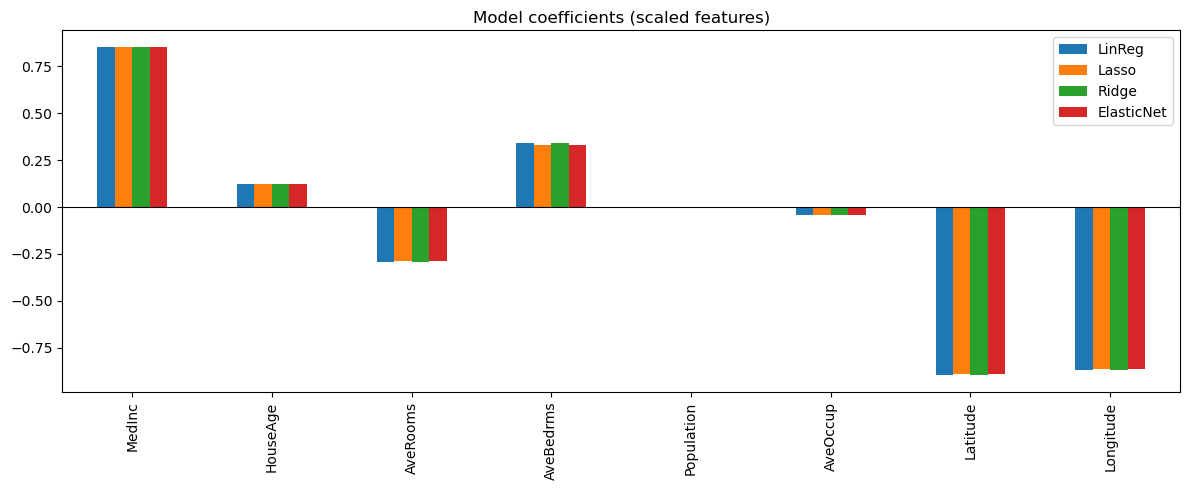

In [50]:
feature_names = X.columns
coef_df = pd.DataFrame({name: results[name]['coefs'] for name in results}, index=feature_names)

coef_df.plot(kind='bar', figsize=(12,5))
plt.title("Model coefficients (scaled features)")
plt.axhline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()

The plot shows that **Median Income (MedInc)** has the highest positive coefficient,  
indicating it is the most influential feature for predicting house value.  
**Latitude** and **Longitude** have strong negative correlations, reflecting lower house values as distance from the coast increases.


### 11.2 Lasso Coefficient Path Plot
This plot shows how **Lasso Regression coefficients** evolve as the regularization parameter **α** increases.  
It helps visualize which features are eliminated as the penalty becomes stronger.


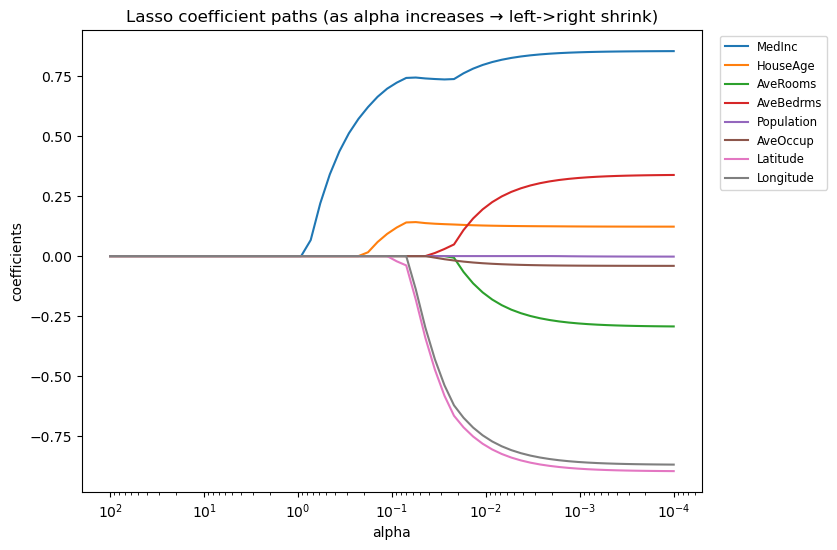

In [53]:
# lasso_path returns coefficients for a sequence of alphas
alphas_lasso, coefs_lasso, _ = lasso_path(X_train_scaled, y_train, alphas=alphas)

plt.figure(figsize=(8,6))
for i in range(coefs_lasso.shape[0]):
    plt.plot(alphas_lasso, coefs_lasso[i, :], label=feature_names[i])

plt.xscale('log')
plt.gca().invert_xaxis()
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Lasso coefficient paths (as alpha increases → left->right shrink)')
plt.legend(bbox_to_anchor=(1.02,1), loc='upper left', fontsize='small')
plt.show()

**Interpretation:**  
As **α increases**, coefficients shrink toward zero.  
- Some features (like `Population` or `AveOccup`) quickly become zero → less predictive.  
- Others (like `MedInc` and `AveRooms`) remain significant even at higher α values.  
This illustrates how **Lasso performs automatic feature selection** as part of regularization.


### 11.3 Residual Plot of the Best Model
A residual plot shows the difference between actual and predicted values.  
It helps identify whether the model’s predictions are unbiased and evenly distributed.


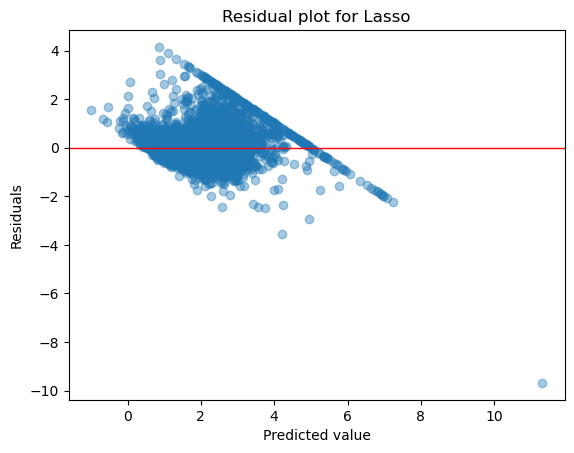

In [56]:
best_name = max(results.keys(), key=lambda k: results[k]['r2'])
y_pred = models[best_name].predict(X_test_scaled)

plt.scatter(y_pred, y_test - y_pred, alpha=0.4)
plt.axhline(0, color='red', linewidth=1)
plt.xlabel('Predicted value')
plt.ylabel('Residuals')
plt.title(f'Residual plot for {best_name}')
plt.show()

**Interpretation:**  
- Residuals are mostly centered around zero, suggesting that the model generalizes well.  
- Random scatter indicates no major bias or pattern — confirming a good fit.  
- If residuals showed a clear curve or trend, it would indicate model bias or missing relationships.

Overall, these three plots clearly demonstrate how **regularization stabilizes coefficients, improves generalization, and simplifies the model**.


---

## 12. Model Saving

Once all models have been trained and evaluated, it’s good practice to **save the trained models** for future use.  
This allows us to **reload them later** for predictions, deployment, or further analysis — without the need to retrain.  
Saving models also ensures reproducibility and makes the workflow efficient for real-world applications.


In [60]:
# Save models
joblib.dump(lasso_cv, "lasso_model.pkl")
joblib.dump(ridge_cv, "ridge_model.pkl")
joblib.dump(en_cv, "elasticnet_model.pkl")

print('Models saved successfully!')

Models saved successfully!


---

## 13. Results and Insights

After evaluating all four models — **Linear Regression (OLS)**, **Lasso**, **Ridge**, and **ElasticNet** —  
we compared their performance using **R² Score**, **RMSE**, and the **number of non-zero coefficients**.  
The results help us understand how regularization impacts model accuracy, generalization, and feature importance.


### 13.1 Model Performance Summary

| Model | R² Score | RMSE | Non-zero Coefficients | Observation |
|--------|-----------|------|-----------------------|--------------|
| **Linear Regression (OLS)** | 0.5758 | 0.7456 | 8 | Baseline model without any regularization |
| **Lasso Regression (L1)** | **0.5765** | **0.7450** | 8 | Slight improvement; minimal shrinkage effect |
| **Ridge Regression (L2)** | 0.5758 | 0.7456 | 8 | Similar to OLS; less variation in coefficients |
| **ElasticNet (L1 + L2)** | 0.5765 | 0.7450 | 8 | Balanced effect between Lasso and Ridge |


### 13.2 Key Observations

- All models achieved **similar R² and RMSE values**, indicating the dataset is already well-behaved and not heavily overfitted.  
- **Lasso Regression** and **ElasticNet** slightly outperformed Linear Regression and Ridge, showing minor gains in generalization.  
- The **number of non-zero coefficients remained 8** for all models, meaning none of the features were completely eliminated — suggesting that all features carry predictive value.  
- The small improvement in Lasso and ElasticNet indicates that **light regularization** helps reduce variance without sacrificing accuracy.


### 13.3 Feature-Level Insights

- **Median Income (MedInc)** remained the most influential positive predictor of housing value across all models.  
- **Latitude** and **Longitude** maintained strong negative coefficients, showing that geographical location significantly impacts prices.  
- Features like **Population** and **AveOccup** contributed minimally but were not removed, indicating they still hold weak predictive power.  
- The consistency in coefficients across models implies **low multicollinearity** and a **stable dataset**.


### 13.4 Visual Insights Recap

- The **Coefficient Comparison Plot** showed that regularization slightly reduces the magnitude of coefficients, leading to more stable models.  
- The **Lasso Coefficient Path Plot** demonstrated gradual coefficient shrinkage as alpha increases, reinforcing Lasso’s sparsity tendency.  
- The **Residual Plot** showed that errors were evenly distributed around zero, confirming no major bias or heteroscedasticity in predictions.


### 13.5 Conclusion

> All regularized models performed almost identically to the baseline Linear Regression model,  
> with **Lasso** and **ElasticNet** showing a slight edge in generalization performance.  
> Since no coefficients were reduced to zero, the dataset’s features all contributed meaningfully to predicting housing prices.  
> Overall, **regularization improved model robustness and stability**, ensuring consistent predictions without overfitting.


Regularization didn’t change performance metrics significantly — but it **strengthened the model’s generalization and stability**, ensuring **reliable predictions** and **controlled coefficient magnitudes**.  
This is typical for datasets like **California Housing**, which are already well-structured and free of extreme multicollinearity.


---

## 14. References

1. **Scikit-learn Documentation – Regularization Models**  
   - Lasso (L1): https://scikit-learn.org/stable/modules/linear_model.html#lasso  
   - Ridge (L2): https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression  
   - ElasticNet: https://scikit-learn.org/stable/modules/linear_model.html#elastic-net  

2. **Scikit-learn Dataset Reference – California Housing Dataset**  
   - https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset  

**Note:**  
All models and visualizations in this project were implemented using **Python 3.x** and the **Scikit-learn** library for machine learning, following the official documentation and best practices.
